In [42]:
import numpy as np
def AND_gate(x):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x[0]*w1 + x[1]*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [43]:
input_data = np.array([[0,0],[0,1],[1,0],[1,1]])
result = []
for x in input_data:
    result.append(AND_gate(x))
print(result)

[0, 0, 0, 1]


In [44]:
def NAND_gate(x):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x[0]*w1 + x[1]*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [45]:
input_data = np.array([[0,0],[0,1],[1,0],[1,1]])
result = []
for x in input_data:
    result.append(NAND_gate(x))
print(result)

[1, 1, 1, 0]


In [46]:
def OR_gate(x):
    w1 = 0.6
    w2 = 0.6
    b = -0.5
    result = x[0]*w1 + x[1]*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [47]:
input_data = np.array([[0,0],[0,1],[1,0],[1,1]])
result = []
for x in input_data:
    result.append(OR_gate(x))
print(result)

[0, 1, 1, 1]


In [48]:
input_data = np.array([[0,0],[0,1],[1,0],[1,1]])

s1 = [] #NAND 출력
s2 = [] #OR 출력
new_input = [] #s1, s2의 값으로 AND를 한 입력값 저장 배열
final_output = [] #AND 출력 리스트

for i in range(len(input_data)):
    s1=NAND_gate(input_data[i]) #NAND 출력
    s2=OR_gate(input_data[i]) #OR 출력
    
    new_input.append(s1)
    new_input.append(s2)
    
    #print (new_input)
    result = AND_gate(new_input) #AND 1개 수행결과 출력
    final_output.append(result)
    new_input = []
print(final_output)



[0, 1, 1, 0]


In [49]:
import torch
import torch.nn as nn
import torch.optim as optim

X = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
#Y = torch.FloatTensor([[0],[0],[0],[1]]) #and로 훈련데이터 만듦
#Y = torch.FloatTensor([[1],[1],[1],[0]]) #nand로 훈련데이터 만듦
Y = torch.FloatTensor([[0],[1],[1],[0]]) #xor로 훈련데이터 만듦

linear = nn.Linear(2,1,bias=True) #입력 2개, 출력 1개, 편향 사용
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid)

criterion = torch.nn.BCELoss() #이진 분류에 사용하는 비용함수인, 크로스엔트로피 함수
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [50]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X) #모델에 X를 넣어서 hypothesis 예측값을 구하는 학습 시킴
    
    #비용함수    
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0: #100번째 epoch마다 비용 출력
        print(step, cost.item())

0 0.7556345462799072
100 0.6931471824645996
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [51]:
prediction = model(X) #모델에 X를 넣어서 예측값을 구함
print((prediction > 0.5).float()) #예측값이 0.5보다 크면 True, 작으면 False 출력

tensor([[0.],
        [0.],
        [0.],
        [0.]])


**딥러닝 활용 XOR**

In [52]:
#딥러닝 활용 XOR 

X = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
Y = torch.FloatTensor([[0],[1],[1],[0]]) #xor로 훈련데이터 만듦

In [53]:
model = nn.Sequential(
    nn.Linear(2, 10, bias=True), #입력 2개, 출력 10개 첫 번째 은닉층
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True), #마지막 출력층 10개 입력 1개 출력
    nn.Sigmoid()    
)

In [54]:
#비용함수와 옵티마이즈
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)


In [55]:
#모델 학습
for epoch in range(10001):
    optimizer.zero_grad()
    y_hat = model(X)
    
    cost = criterion(y_hat, Y)
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.7080593109130859
100 0.6931492686271667
200 0.6931483149528503
300 0.6931474208831787
400 0.6931465864181519
500 0.6931456327438354
600 0.6931447982788086
700 0.6931439638137817
800 0.6931430101394653
900 0.6931422352790833
1000 0.6931413412094116
1100 0.69314044713974
1200 0.6931394934654236
1300 0.6931384205818176
1400 0.6931374073028564
1500 0.69313645362854
1600 0.6931354403495789
1700 0.6931342482566833
1800 0.6931331157684326
1900 0.6931319236755371
2000 0.693130612373352
2100 0.693129301071167
2200 0.6931278109550476
2300 0.6931262612342834
2400 0.6931247115135193
2500 0.6931229829788208
2600 0.6931209564208984
2700 0.6931190490722656
2800 0.6931167840957642
2900 0.6931143999099731
3000 0.693111777305603
3100 0.6931090354919434
3200 0.6931058764457703
3300 0.6931024193763733
3400 0.6930986642837524
3500 0.6930943727493286
3600 0.6930896639823914
3700 0.6930843591690063
3800 0.693078339099884
3900 0.6930713653564453
4000 0.6930636167526245
4100 0.6930546164512634
4200 0.69304

In [56]:
#모델을 사용하여 값 예측
prediction = model(X)
print((prediction > 0.5).float())

tensor([[0.],
        [1.],
        [1.],
        [0.]])


**하이퍼볼릭탄젠트 함수**

In [57]:
x= np.arange(-5.0, 5.0, 0.1)
y =np.tanh(x)


In [58]:
#커널 충돌나면 하기

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # matplotlib.pyplot 사용 커널 충돌

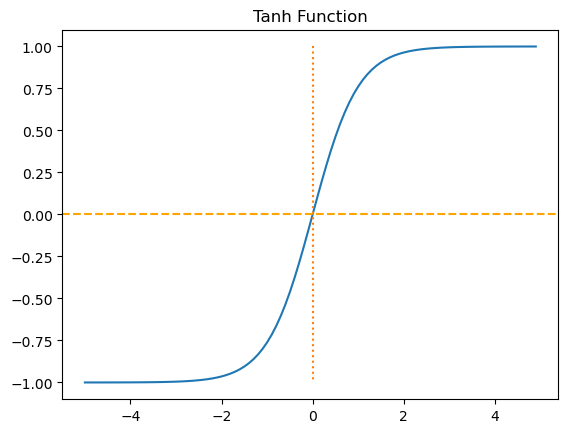

In [59]:
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y = 0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

** ReLU 함수 **

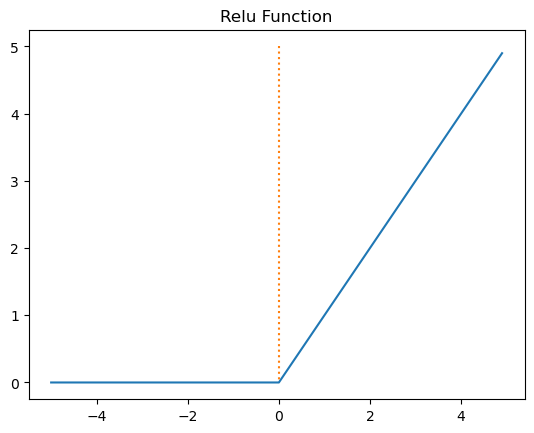

In [61]:
def relu(x):
    return np.maximum(0,x)  #0보다 작은 값은 0으로, 0보다 큰 값은 그대로 출력

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

Leaky Relu

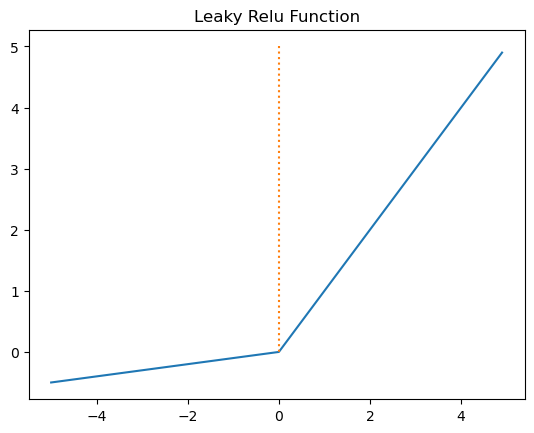

In [62]:
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x,x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x,y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky Relu Function')
plt.show()